In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [2]:
train = pd.read_csv('data/train.csv').set_index('id')
test = pd.read_csv('data/train.csv').set_index('id')

In [3]:
documents = train.comment_text
documents.head()

id
0000997932d777bf    Explanation\nWhy the edits made under my usern...
000103f0d9cfb60f    D'aww! He matches this background colour I'm s...
000113f07ec002fd    Hey man, I'm really not trying to edit war. It...
0001b41b1c6bb37e    "\nMore\nI can't make any real suggestions on ...
0001d958c54c6e35    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

## 1-gram binary

In [4]:
%%time

vectorizer1 = CountVectorizer(
    analyzer='word', max_features=500, stop_words='english', binary=True)

# array of occurrences
bag1 = vectorizer1.fit_transform(documents)

# construct dataframe
bag1 = pd.DataFrame(
    data=bag1.toarray(), columns=vectorizer1.get_feature_names(), index=documents.index)

# sort columns
bag1 = bag1[bag1.sum().sort_values(ascending=False).index]

CPU times: user 8.66 s, sys: 492 ms, total: 9.16 s
Wall time: 9.15 s


## 2-gram binary

In [5]:
%%time

vectorizer2 = CountVectorizer(
    analyzer='word', max_features=500, stop_words='english', ngram_range=(2,2), binary=True)

# array of occurrences
bag2 = vectorizer2.fit_transform(documents)

# construct dataframe
bag2 = pd.DataFrame(
    data=bag2.toarray(), columns=vectorizer2.get_feature_names(), index=documents.index)

# sort columns
bag2 = bag2[bag2.sum().sort_values(ascending=False).index]

CPU times: user 23.6 s, sys: 812 ms, total: 24.4 s
Wall time: 24.4 s


## look around and save

In [6]:
bag1.head()

,article,page,wikipedia,talk,just,like,don,think,know,edit,...,tildes,works,government,banned,context,accepted,citation,comes,file,2004
id,,,,,,,,,,,,,,,,,,,,,
0000997932d777bf,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000103f0d9cfb60f,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000113f07ec002fd,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0001b41b1c6bb37e,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
0001d958c54c6e35,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
bag1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159571 entries, 0000997932d777bf to fff46fc426af1f9a
Columns: 500 entries, article to 2004
dtypes: int64(500)
memory usage: 609.9+ MB


In [8]:
bag2.head()

,talk page,don know,blocked editing,feel free,http www,don think,talk pages,talk contribs,speedy deletion,welcome wikipedia,...,box note,reverted contact,subject importance,notice image,page did,ve heard,citing sources,significance deleted,make edit,image use
id,,,,,,,,,,,,,,,,,,,,,
0000997932d777bf,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000103f0d9cfb60f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000113f07ec002fd,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001b41b1c6bb37e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001d958c54c6e35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
bag2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159571 entries, 0000997932d777bf to fff46fc426af1f9a
Columns: 500 entries, talk page to image use
dtypes: int64(500)
memory usage: 609.9+ MB


In [10]:
%%time
bag1.to_csv('partial_results/train_bow_1gram.csv')
bag2.to_csv('partial_results/train_bow_2gram.csv')

CPU times: user 1min 11s, sys: 396 ms, total: 1min 11s
Wall time: 1min 11s


## visualize something

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

(0, 0.2112272906731173)

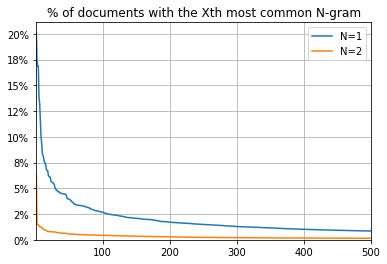

In [12]:
tempdf = bag1.copy()
tempdf.columns = range(1, len(tempdf.columns) + 1)
tempdf.mean().plot.line(label='N=1')

tempdf = bag2.copy()
tempdf.columns = range(1, len(tempdf.columns) + 1)
tempdf.mean().plot.line(label='N=2')

ax = plt.gca()
ax.set_title('% of documents with the Xth most common N-gram')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend()
ax.grid()
ax.set_ylim(0, None)

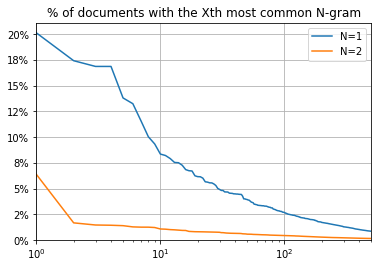

In [13]:
tempdf = bag1.copy()
tempdf.columns = range(1, len(tempdf.columns) + 1)
tempdf.mean().plot.line(label='N=1')

tempdf = bag2.copy()
tempdf.columns = range(1, len(tempdf.columns) + 1)
tempdf.mean().plot.line(label='N=2')

ax = plt.gca()
ax.set_title('% of documents with the Xth most common N-gram')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend()
ax.grid()
ax.set_ylim(0, None)
ax.set_xscale('log')

## new bag

In [14]:
from nltk import word_tokenize

In [15]:
%%time
vectorizer3 = CountVectorizer(analyzer='word', tokenizer=word_tokenize, max_features=500)
bag3 = vectorizer3.fit_transform(documents)

CPU times: user 2min 4s, sys: 116 ms, total: 2min 4s
Wall time: 2min 4s


In [16]:
bag3 = pd.DataFrame(
    data=bag3.toarray(), columns=vectorizer3.get_feature_names(), index=documents.index)

# sort columns
bag3 = bag3[bag3.sum().sort_values(ascending=False).index]

In [17]:
bag3.sum().sort_values(ascending=False)

.              495439
the            495401
,              471812
to             296851
''             242528
i              236495
of             224008
and            222709
you            216674
a              214033
is             180287
that           160512
``             155370
it             147625
in             144392
!              105576
for            102451
this            96943
not             96581
)               90711
on              89409
(               85085
be              83326
:               82772
as              77269
have            73939
are             73404
?               71692
's              66767
your            63258
                ...  
redirect         2625
known            2621
school           2590
notability       2587
love             2584
move             2578
project          2577
sentence         2572
appropriate      2569
changed          2567
explain          2564
started          2556
four             2543
included         2530
removing  